# Transfer learning - Survival prediction
Use best epoch and all dataset for training

In [1]:
import os
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/home/shenwanxiang/anaconda3"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import tensorflow as tf
tf.test.is_gpu_available()

tf.config.run_functions_eagerly(True)

tf.__version__
import sys
sys.path.append('../../../codeocean/environment/clinical_transformer/')



2025-08-14 16:56:19.857538: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 16:56:19.914369: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-14 16:56:20.262839: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-14 16:56:20.262871: W tensorflow/compiler/xla/stream_exe

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-08-14 16:56:20.673177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 16:56:20.685221: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 16:56:20.701702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 16:56:20.701794: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [2]:
from xai.models import Trainer
from xai.models import SurvivalTransformer
from xai.models import OptimizedSurvivalDataGenerator as SurvivalDataGenerator
from xai.losses.survival import cIndex_SigmoidApprox as cindex_loss
from xai.metrics.survival import sigmoid_concordance as cindex_metric

In [3]:
import pandas as pd
from samecode.random import set_seed

## Dataset

In [4]:
data = pd.read_csv('./data/dataset-train.data.csv')
features = data.columns[-44:].tolist()
#features
data.shape

(562, 52)

## Parameters

In [5]:
max_features_percentile=100
test_size=0.0 # fraction of samples used for validation
repetitions=10 # number replicates (training / validation) random splits to evaluate variability.

mode='survival'
learning_rate=0.0001
epochs=84
verbose=1
seed=0
embedding_size = 128
num_heads = 2
num_layers = 8

In [6]:
! rm -r ./results/TransferLearningSurvival_all/

/bin/sh: /home/shenwanxiang/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/sh)
rm: cannot remove './results/TransferLearningSurvival_all/': No such file or directory


## Training

In [7]:
outdir = './results/TransferLearningSurvival_all/'

set_seed(0)

trainer = Trainer(
    from_pretrained='../FoundationModel/fold-0_id-0/model.E002000.h5',
    out_dir = outdir,
    max_features_percentile=max_features_percentile,
    test_size=test_size,
    mode=mode,
    model=SurvivalTransformer, 
    dataloader=SurvivalDataGenerator,
    loss=cindex_loss,
    metrics=[cindex_metric]
)

trainer.setup_data(
    data, 
    discrete_features = [],
    continuous_features = features,
    target=['time', 'event']
)

trainer.setup_model(
    learning_rate=learning_rate,
    embedding_size=embedding_size,
    num_heads=num_heads,
    num_layers=num_layers,
    batch_size_max=True,
    save_best_only=False
)

trainer.fit(repetitions=repetitions, epochs=epochs, verbose=verbose, seed=seed)

/home/shenwanxiang/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO	2025-08-14 16:56:22,328	Setting up working directory: ./results/TransferLearningSurvival_all/
INFO	2025-08-14 16:56:22,329	Setting up transfer learning directory: ./results/TransferLearningSurvival_all//model.E002000.h5/
2025-08-14 16:56:22.332073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 16:56:22.332229: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 16:56:22.332287: I tensorflow/compiler

Epoch 1/84


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 16:56:23,860	AutoGraph could not transform <function cIndex_SigmoidApprox at 0x7f4e61145680> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 16:56:24,104	AutoGraph could not transform <function sigmoid_concordance at 0x7f4ec40d4200> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 546ms/step - loss: 0.5139 - sigmoid_concordance: 0.4719 - val_loss: 0.4893 - val_sigmoid_concordance: 0.5625
Epoch 2/84
1/1 [==============================] - 0s 306ms/step - loss: 0.4974 - sigmoid_concordance: 0.5063 - val_loss: 0.4907 - val_sigmoid_concordance: 0.5625
Epoch 3/84
1/1 [==============================] - 0s 304ms/step - loss: 0.4991 - sigmoid_concordance: 0.5004 - val_loss: 0.4917 - val_sigmoid_concordance: 0.4688
Epoch 4/84
1/1 [==============================] - 0s 312ms/step - loss: 0.4845 - sigmoid_concordance: 0.5343 - val_loss: 0.4908 - val_sigmoid_concordance: 0.5312
Epoch 5/84
1/1 [==============================] - 0s 305ms/s

INFO	2025-08-14 16:56:50,420	RUN ID: fold-1_id-1
INFO	2025-08-14 16:56:50,420	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-1_id-1/
INFO	2025-08-14 16:56:50,475	Training samples: 562
INFO	2025-08-14 16:56:50,475	Testing samples: 10
INFO	2025-08-14 16:56:50,476	Number of features at 100th percentile: 44 that are non nans


Epoch 1/84
1/1 [==============================] - 0s 471ms/step - loss: 0.5001 - sigmoid_concordance: 0.5018 - val_loss: 0.5142 - val_sigmoid_concordance: 0.3438
Epoch 2/84
1/1 [==============================] - 0s 309ms/step - loss: 0.4998 - sigmoid_concordance: 0.4962 - val_loss: 0.5113 - val_sigmoid_concordance: 0.5000
Epoch 3/84
1/1 [==============================] - 0s 309ms/step - loss: 0.4772 - sigmoid_concordance: 0.5454 - val_loss: 0.5085 - val_sigmoid_concordance: 0.5000
Epoch 4/84
1/1 [==============================] - 0s 309ms/step - loss: 0.4682 - sigmoid_concordance: 0.5678 - val_loss: 0.5024 - val_sigmoid_concordance: 0.5312
Epoch 5/84
1/1 [==============================] - 0s 308ms/step - loss: 0.4659 - sigmoid_concordance: 0.5681 - val_loss: 0.4968 - val_sigmoid_concordance: 0.5625
Epoch 6/84
1/1 [==============================] - 0s 307ms/step - loss: 0.4561 - sigmoid_concordance: 0.5895 - val_loss: 0.4954 - val_sigmoid_concordance: 0.5312
Epoch 7/84
1/1 [============

INFO	2025-08-14 16:57:17,311	RUN ID: fold-2_id-2
INFO	2025-08-14 16:57:17,312	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-2_id-2/
INFO	2025-08-14 16:57:17,367	Training samples: 562
INFO	2025-08-14 16:57:17,367	Testing samples: 10
INFO	2025-08-14 16:57:17,367	Number of features at 100th percentile: 44 that are non nans


Epoch 1/84
1/1 [==============================] - 0s 472ms/step - loss: 0.4759 - sigmoid_concordance: 0.5488 - val_loss: 0.5415 - val_sigmoid_concordance: 0.2812
Epoch 2/84
1/1 [==============================] - 0s 303ms/step - loss: 0.4795 - sigmoid_concordance: 0.5395 - val_loss: 0.5492 - val_sigmoid_concordance: 0.3125
Epoch 3/84
1/1 [==============================] - 0s 305ms/step - loss: 0.4677 - sigmoid_concordance: 0.5580 - val_loss: 0.5539 - val_sigmoid_concordance: 0.3125
Epoch 4/84
1/1 [==============================] - 0s 304ms/step - loss: 0.4493 - sigmoid_concordance: 0.5866 - val_loss: 0.5538 - val_sigmoid_concordance: 0.3438
Epoch 5/84
1/1 [==============================] - 0s 305ms/step - loss: 0.4505 - sigmoid_concordance: 0.5782 - val_loss: 0.5531 - val_sigmoid_concordance: 0.3438
Epoch 6/84
1/1 [==============================] - 0s 309ms/step - loss: 0.4372 - sigmoid_concordance: 0.5947 - val_loss: 0.5480 - val_sigmoid_concordance: 0.3750
Epoch 7/84
1/1 [============

INFO	2025-08-14 16:57:44,268	RUN ID: fold-3_id-3
INFO	2025-08-14 16:57:44,268	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-3_id-3/
INFO	2025-08-14 16:57:44,323	Training samples: 562
INFO	2025-08-14 16:57:44,323	Testing samples: 10
INFO	2025-08-14 16:57:44,323	Number of features at 100th percentile: 44 that are non nans


Epoch 1/84
1/1 [==============================] - 0s 465ms/step - loss: 0.5198 - sigmoid_concordance: 0.4596 - val_loss: 0.4664 - val_sigmoid_concordance: 0.7188
Epoch 2/84
1/1 [==============================] - 0s 314ms/step - loss: 0.5133 - sigmoid_concordance: 0.4740 - val_loss: 0.4693 - val_sigmoid_concordance: 0.6875
Epoch 3/84
1/1 [==============================] - 0s 304ms/step - loss: 0.4755 - sigmoid_concordance: 0.5485 - val_loss: 0.4706 - val_sigmoid_concordance: 0.7812
Epoch 4/84
1/1 [==============================] - 0s 304ms/step - loss: 0.4880 - sigmoid_concordance: 0.5190 - val_loss: 0.4674 - val_sigmoid_concordance: 0.8125
Epoch 5/84
1/1 [==============================] - 0s 305ms/step - loss: 0.4691 - sigmoid_concordance: 0.5568 - val_loss: 0.4628 - val_sigmoid_concordance: 0.7812
Epoch 6/84
1/1 [==============================] - 0s 309ms/step - loss: 0.4822 - sigmoid_concordance: 0.5314 - val_loss: 0.4558 - val_sigmoid_concordance: 0.7188
Epoch 7/84
1/1 [============

INFO	2025-08-14 16:58:11,174	RUN ID: fold-4_id-4
INFO	2025-08-14 16:58:11,174	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-4_id-4/
INFO	2025-08-14 16:58:11,230	Training samples: 562
INFO	2025-08-14 16:58:11,230	Testing samples: 10
INFO	2025-08-14 16:58:11,231	Number of features at 100th percentile: 44 that are non nans


Epoch 1/84
1/1 [==============================] - 0s 466ms/step - loss: 0.5007 - sigmoid_concordance: 0.4974 - val_loss: 0.4753 - val_sigmoid_concordance: 0.7500
Epoch 2/84
1/1 [==============================] - 0s 317ms/step - loss: 0.4810 - sigmoid_concordance: 0.5337 - val_loss: 0.4620 - val_sigmoid_concordance: 0.7500
Epoch 3/84
1/1 [==============================] - 0s 307ms/step - loss: 0.4894 - sigmoid_concordance: 0.5184 - val_loss: 0.4530 - val_sigmoid_concordance: 0.7188
Epoch 4/84
1/1 [==============================] - 0s 313ms/step - loss: 0.4635 - sigmoid_concordance: 0.5654 - val_loss: 0.4402 - val_sigmoid_concordance: 0.7500
Epoch 5/84
1/1 [==============================] - 0s 303ms/step - loss: 0.4729 - sigmoid_concordance: 0.5481 - val_loss: 0.4174 - val_sigmoid_concordance: 0.7500
Epoch 6/84
1/1 [==============================] - 0s 302ms/step - loss: 0.4438 - sigmoid_concordance: 0.5836 - val_loss: 0.3905 - val_sigmoid_concordance: 0.7500
Epoch 7/84
1/1 [============

INFO	2025-08-14 16:58:37,972	RUN ID: fold-5_id-5
INFO	2025-08-14 16:58:37,972	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-5_id-5/
INFO	2025-08-14 16:58:38,113	Training samples: 562
INFO	2025-08-14 16:58:38,113	Testing samples: 10
INFO	2025-08-14 16:58:38,114	Number of features at 100th percentile: 44 that are non nans


Epoch 1/84
1/1 [==============================] - 0s 480ms/step - loss: 0.5247 - sigmoid_concordance: 0.4567 - val_loss: 0.4600 - val_sigmoid_concordance: 0.8438
Epoch 2/84
1/1 [==============================] - 0s 306ms/step - loss: 0.5136 - sigmoid_concordance: 0.4767 - val_loss: 0.4586 - val_sigmoid_concordance: 0.8125
Epoch 3/84
1/1 [==============================] - 0s 315ms/step - loss: 0.4852 - sigmoid_concordance: 0.5318 - val_loss: 0.4578 - val_sigmoid_concordance: 0.6875
Epoch 4/84
1/1 [==============================] - 0s 330ms/step - loss: 0.4953 - sigmoid_concordance: 0.5052 - val_loss: 0.4602 - val_sigmoid_concordance: 0.6562
Epoch 5/84
1/1 [==============================] - 0s 307ms/step - loss: 0.4834 - sigmoid_concordance: 0.5273 - val_loss: 0.4605 - val_sigmoid_concordance: 0.6562
Epoch 6/84
1/1 [==============================] - 0s 320ms/step - loss: 0.4674 - sigmoid_concordance: 0.5548 - val_loss: 0.4599 - val_sigmoid_concordance: 0.5938
Epoch 7/84
1/1 [============

INFO	2025-08-14 16:59:05,136	RUN ID: fold-6_id-6
INFO	2025-08-14 16:59:05,136	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-6_id-6/
INFO	2025-08-14 16:59:05,190	Training samples: 562
INFO	2025-08-14 16:59:05,190	Testing samples: 10
INFO	2025-08-14 16:59:05,191	Number of features at 100th percentile: 44 that are non nans


Epoch 1/84
1/1 [==============================] - 0s 470ms/step - loss: 0.4927 - sigmoid_concordance: 0.5159 - val_loss: 0.5096 - val_sigmoid_concordance: 0.3750
Epoch 2/84
1/1 [==============================] - 0s 308ms/step - loss: 0.4790 - sigmoid_concordance: 0.5452 - val_loss: 0.5053 - val_sigmoid_concordance: 0.4375
Epoch 3/84
1/1 [==============================] - 0s 306ms/step - loss: 0.4752 - sigmoid_concordance: 0.5438 - val_loss: 0.5048 - val_sigmoid_concordance: 0.5000
Epoch 4/84
1/1 [==============================] - 0s 307ms/step - loss: 0.4848 - sigmoid_concordance: 0.5300 - val_loss: 0.5010 - val_sigmoid_concordance: 0.5000
Epoch 5/84
1/1 [==============================] - 0s 308ms/step - loss: 0.4480 - sigmoid_concordance: 0.5805 - val_loss: 0.4927 - val_sigmoid_concordance: 0.5312
Epoch 6/84
1/1 [==============================] - 0s 313ms/step - loss: 0.4521 - sigmoid_concordance: 0.5751 - val_loss: 0.4774 - val_sigmoid_concordance: 0.5312
Epoch 7/84
1/1 [============

INFO	2025-08-14 16:59:32,098	RUN ID: fold-7_id-7
INFO	2025-08-14 16:59:32,099	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-7_id-7/
INFO	2025-08-14 16:59:32,154	Training samples: 562
INFO	2025-08-14 16:59:32,154	Testing samples: 10
INFO	2025-08-14 16:59:32,155	Number of features at 100th percentile: 44 that are non nans


Epoch 1/84
1/1 [==============================] - 0s 473ms/step - loss: 0.5184 - sigmoid_concordance: 0.4655 - val_loss: 0.5089 - val_sigmoid_concordance: 0.5000
Epoch 2/84
1/1 [==============================] - 0s 306ms/step - loss: 0.4970 - sigmoid_concordance: 0.5092 - val_loss: 0.5029 - val_sigmoid_concordance: 0.5000
Epoch 3/84
1/1 [==============================] - 0s 306ms/step - loss: 0.4861 - sigmoid_concordance: 0.5242 - val_loss: 0.4986 - val_sigmoid_concordance: 0.5312
Epoch 4/84
1/1 [==============================] - 0s 305ms/step - loss: 0.4720 - sigmoid_concordance: 0.5497 - val_loss: 0.4905 - val_sigmoid_concordance: 0.6562
Epoch 5/84
1/1 [==============================] - 0s 306ms/step - loss: 0.4646 - sigmoid_concordance: 0.5574 - val_loss: 0.4820 - val_sigmoid_concordance: 0.5625
Epoch 6/84
1/1 [==============================] - 0s 311ms/step - loss: 0.4526 - sigmoid_concordance: 0.5766 - val_loss: 0.4700 - val_sigmoid_concordance: 0.6250
Epoch 7/84
1/1 [============

INFO	2025-08-14 16:59:58,928	RUN ID: fold-8_id-8
INFO	2025-08-14 16:59:58,928	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-8_id-8/
INFO	2025-08-14 16:59:58,983	Training samples: 562
INFO	2025-08-14 16:59:58,984	Testing samples: 10
INFO	2025-08-14 16:59:58,984	Number of features at 100th percentile: 44 that are non nans


Epoch 1/84
1/1 [==============================] - 0s 462ms/step - loss: 0.5130 - sigmoid_concordance: 0.4683 - val_loss: 0.4826 - val_sigmoid_concordance: 0.6562
Epoch 2/84
1/1 [==============================] - 0s 304ms/step - loss: 0.4774 - sigmoid_concordance: 0.5462 - val_loss: 0.4759 - val_sigmoid_concordance: 0.6875
Epoch 3/84
1/1 [==============================] - 0s 311ms/step - loss: 0.4930 - sigmoid_concordance: 0.5113 - val_loss: 0.4715 - val_sigmoid_concordance: 0.5625
Epoch 4/84
1/1 [==============================] - 0s 308ms/step - loss: 0.4674 - sigmoid_concordance: 0.5623 - val_loss: 0.4628 - val_sigmoid_concordance: 0.6250
Epoch 5/84
1/1 [==============================] - 0s 307ms/step - loss: 0.4521 - sigmoid_concordance: 0.5790 - val_loss: 0.4508 - val_sigmoid_concordance: 0.6250
Epoch 6/84
1/1 [==============================] - 0s 305ms/step - loss: 0.4457 - sigmoid_concordance: 0.5858 - val_loss: 0.4486 - val_sigmoid_concordance: 0.6250
Epoch 7/84
1/1 [============

INFO	2025-08-14 17:00:25,881	RUN ID: fold-9_id-9
INFO	2025-08-14 17:00:25,881	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-9_id-9/
INFO	2025-08-14 17:00:25,935	Training samples: 562
INFO	2025-08-14 17:00:25,935	Testing samples: 10
INFO	2025-08-14 17:00:25,936	Number of features at 100th percentile: 44 that are non nans


Epoch 1/84
1/1 [==============================] - 0s 466ms/step - loss: 0.5043 - sigmoid_concordance: 0.4866 - val_loss: 0.4745 - val_sigmoid_concordance: 0.7500
Epoch 2/84
1/1 [==============================] - 0s 303ms/step - loss: 0.4840 - sigmoid_concordance: 0.5246 - val_loss: 0.4898 - val_sigmoid_concordance: 0.5938
Epoch 3/84
1/1 [==============================] - 0s 307ms/step - loss: 0.4571 - sigmoid_concordance: 0.5833 - val_loss: 0.5244 - val_sigmoid_concordance: 0.4375
Epoch 4/84
1/1 [==============================] - 0s 315ms/step - loss: 0.4591 - sigmoid_concordance: 0.5682 - val_loss: 0.5426 - val_sigmoid_concordance: 0.3750
Epoch 5/84
1/1 [==============================] - 0s 308ms/step - loss: 0.4553 - sigmoid_concordance: 0.5759 - val_loss: 0.5092 - val_sigmoid_concordance: 0.5312
Epoch 6/84
1/1 [==============================] - 0s 305ms/step - loss: 0.4510 - sigmoid_concordance: 0.5779 - val_loss: 0.4362 - val_sigmoid_concordance: 0.6875
Epoch 7/84
1/1 [============

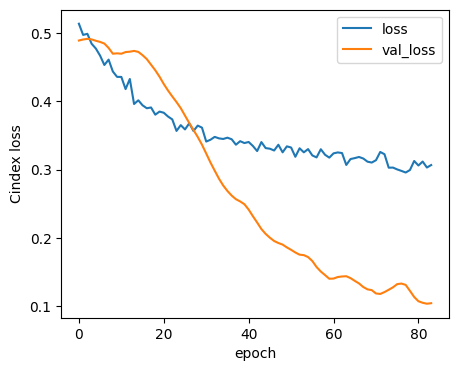

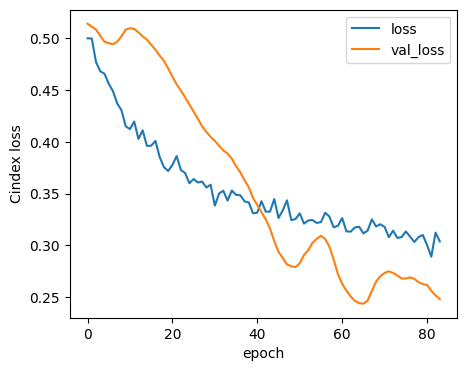

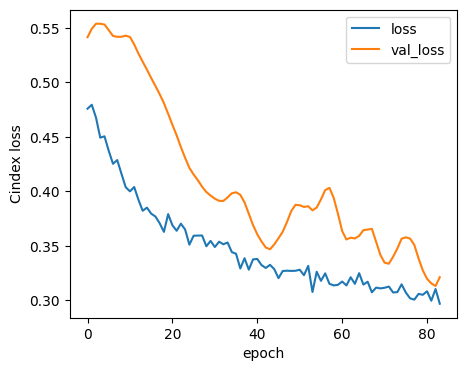

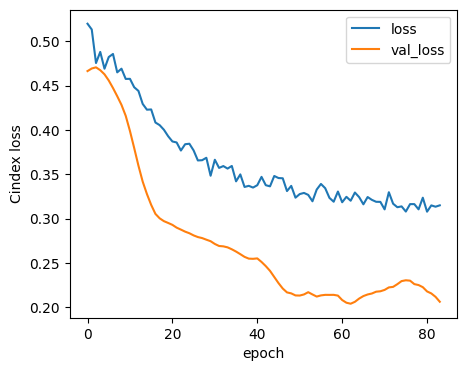

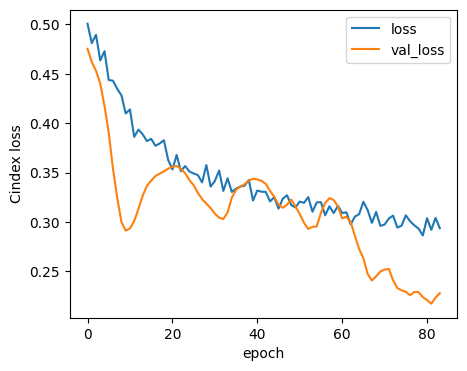

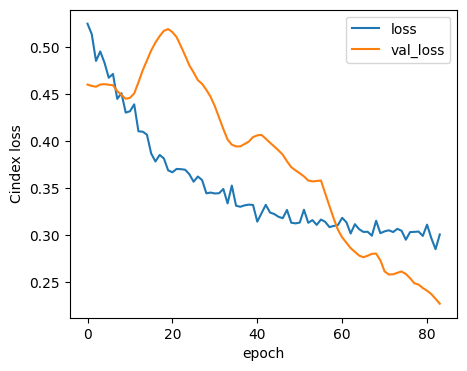

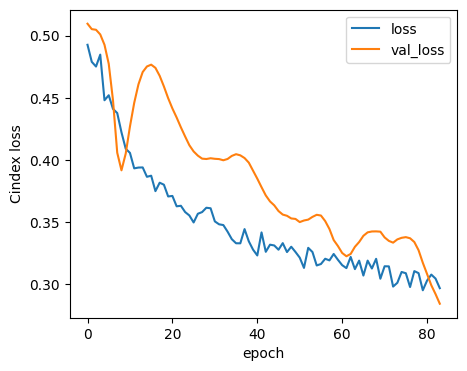

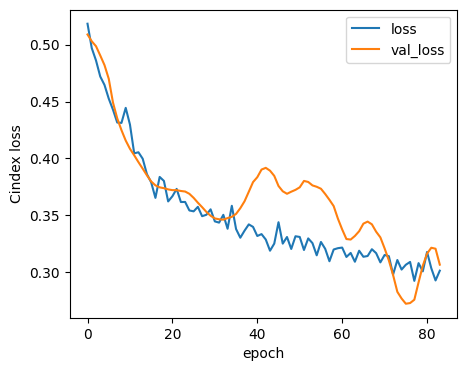

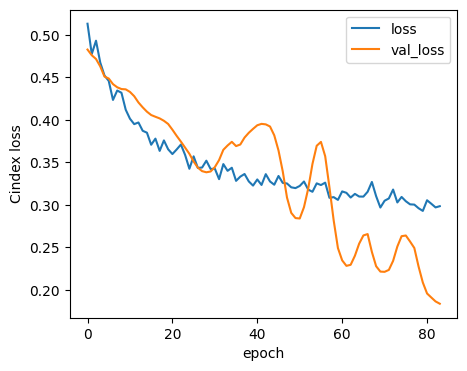

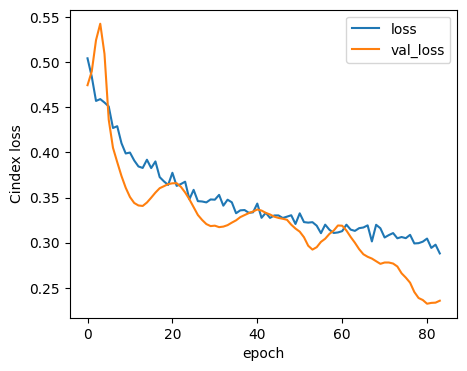

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
best_es = []
for i in range(repetitions):
    dfh = pd.read_csv("./results/TransferLearningSurvival_all/model.E002000.h5/fold-%s_id-%s/history.csv" % (i,i), index_col=0)
    fig, ax=plt.subplots(figsize=(5,4))
    dfh[['loss', 'val_loss']].plot(ax=ax)
    ax.set_ylabel('Cindex loss')
    
    best_e1 = dfh.val_loss.idxmin()
    best_e2 = dfh.val_sigmoid_concordance.idxmax()
    best_es.append(best_e1)
    #best_es.append(best_e2)
    
best_epoch = pd.DataFrame(best_es)[0].median()